# TP Meshes

*Authors: Johnathan GUERIN & Benjamin TERNOT*

In [1]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import distance
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde


## Bunny

In [2]:
# -*- coding: utf-8 -*-

"""circum_sphere

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1YncydsXf5p5nAbBU8vn3qlouo82Y8f18
"""

output_folder = "outputs/"

# (3D)
# Open the file and read the vertices as strings
with open("Bunny.xyz", "r") as f:
    vertex_strings = f.readlines()

# Convert the vertex strings to a NumPy array of shape (N, 3)
points3D = np.zeros((len(vertex_strings), 3))
for i, vertex_str in enumerate(vertex_strings):
    vertex_arr = [float(coord) for coord in vertex_str.strip().split()]
    points3D[i] = vertex_arr


tri = Delaunay(points3D)

radii_bunny = np.zeros(tri.simplices.size)
txt_bunny = np.array([""] * tri.simplices.size, dtype='<U1000')
print("Computing circum radii...")
for ind_t in tqdm(range(tri.simplices.shape[0])):
    tetra = tri.simplices[ind_t]
    for k in range(len(tetra)):
        A, B, C = points3D[tetra[k%4]], points3D[tetra[(k+1)%4]], points3D[tetra[(k+2)%4]] 
        S = 0.5 * np.linalg.norm(np.cross(B-A, C-A))
        r = np.linalg.norm(A-B) * np.linalg.norm(A-C) * np.linalg.norm(B-C) / (2 * S)
        radii_bunny[ind_t * tri.simplices.shape[1] + k] = r
        txt_bunny[ind_t * tri.simplices.shape[1] + k] = f"facet normal 0 0 0\nouter loop\nvertex {A[0]} {A[1]} {A[2]}\nvertex {B[0]} {B[1]} {B[2]}\nvertex {C[0]} {C[1]} {C[2]}\nendloop\nendfacet\n"

Computing circum radii...


  0%|          | 0/246215 [00:00<?, ?it/s]

In [3]:
print("Creating stl files by filtering triangles")
for threshold in tqdm([0.001,
                       0.002, 0.0025,
                       0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
                       0.004, 0.0045,
                       0.005, 0.006, 0.007, 0.008, 0.009,
                       0.01, 0.05, 0.1]):
    with open(f"{output_folder}bunny_t{str(threshold).replace('.', ',')}.stl", "w") as f:
        filtered_tri = txt_bunny[radii_bunny<threshold]
        f.write("".join(filtered_tri))

Creating stl files by filtering triangles


  0%|          | 0/23 [00:00<?, ?it/s]

**NOTE:**
With the treshold of `0.0038`, we obtain a very good result ! If we increase the threshold, we will loose the details, specially in the ears or puckering of skin. If we decrease the threshold, holes will start to appear.

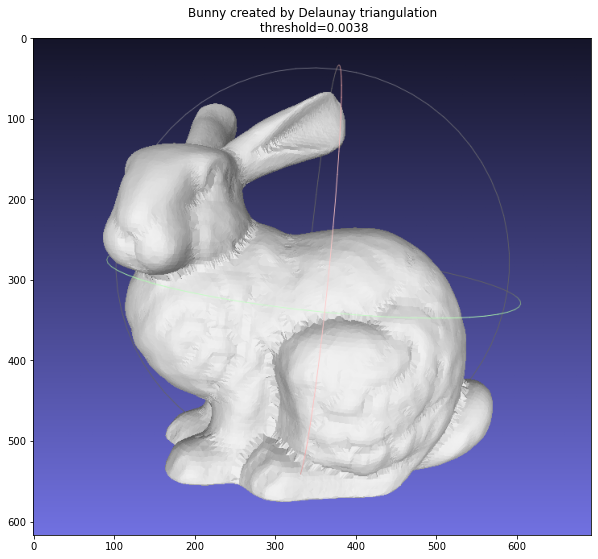

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image file
img = mpimg.imread('bunny_t0,0038.png')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title(f'Bunny created by Delaunay triangulation\n threshold=0.0038')
plt.show()

## Bimba

In [5]:
# -*- coding: utf-8 -*-
"""circum_sphere

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1YncydsXf5p5nAbBU8vn3qlouo82Y8f18
"""

output_folder = "outputs/"

# (3D)
# Open the file and read the vertices as strings
with open("Bimba.xyz", "r") as f:
    vertex_strings = f.readlines()

# Convert the vertex strings to a NumPy array of shape (N, 3)
points3D = np.zeros((len(vertex_strings), 3))
for i, vertex_str in enumerate(vertex_strings):
    vertex_arr = [float(coord) for coord in vertex_str.strip().split()]
    points3D[i] = vertex_arr


tri = Delaunay(points3D)

radii_bimba = np.zeros(tri.simplices.size)
txt_bimba = np.array([""] * tri.simplices.size, dtype='<U1000')
print("Computing circum radii...")
for ind_t in tqdm(range(tri.simplices.shape[0])):
    tetra = tri.simplices[ind_t]
    for k in range(len(tetra)):
        A, B, C = points3D[tetra[k%4]], points3D[tetra[(k+1)%4]], points3D[tetra[(k+2)%4]] 
        S = 0.5 * np.linalg.norm(np.cross(B-A, C-A))
        r = np.linalg.norm(A-B) * np.linalg.norm(A-C) * np.linalg.norm(B-C) / (2 * S)
        radii_bimba[ind_t * tri.simplices.shape[1] + k] = r
        txt_bimba[ind_t * tri.simplices.shape[1] + k] = f"facet normal 0 0 0\nouter loop\nvertex {A[0]} {A[1]} {A[2]}\nvertex {B[0]} {B[1]} {B[2]}\nvertex {C[0]} {C[1]} {C[2]}\nendloop\nendfacet\n"

Computing circum radii...


  0%|          | 0/23617 [00:00<?, ?it/s]

In [7]:
print("Creating stl files by filtering triangles")
for threshold in tqdm([0.01, 0.015, 0.2, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.6, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09]):
    with open(f"{output_folder}bimba_t{str(threshold).replace('.', ',')}.stl", "w") as f:
        filtered_tri = txt_bimba[radii_bimba<threshold]
        f.write("".join(filtered_tri))

Creating stl files by filtering triangles


  0%|          | 0/17 [00:00<?, ?it/s]

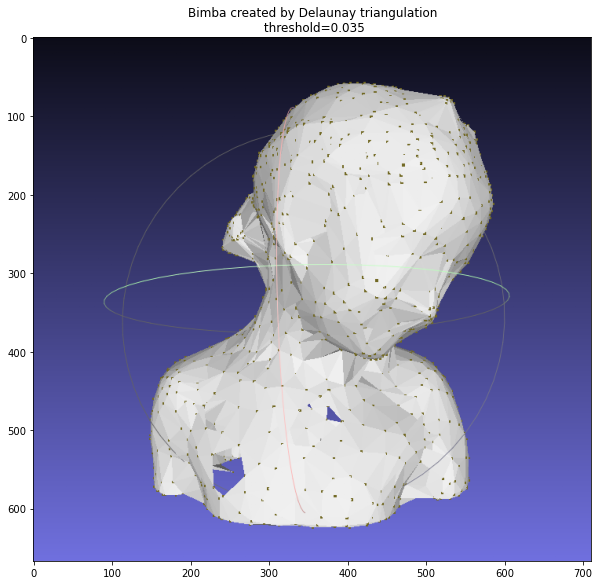

In [8]:
# Load the image file
img = mpimg.imread('bimba_t0,035.png')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title(f'Bimba created by Delaunay triangulation\n threshold=0.035')
plt.show()

**NOTE:**

With the treshold of `0.035`, we obtain a result where some areas are not well detailed (face, neck), but the threshold is too low in others and create holes (chest).  
Then we might need to look for another method, maybe consider a variable threshold that depends on the local density of points.

In [17]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Load point cloud from file
with open("Bimba.xyz", "r") as f:
    vertex_strings = f.readlines()

points3D = np.zeros((len(vertex_strings), 3))
for i, vertex_str in enumerate(vertex_strings):
    vertex_arr = [float(coord) for coord in vertex_str.strip().split()]
    points3D[i] = vertex_arr

# Compute Delaunay triangulation
tri = Delaunay(points3D)

# Compute pairwise distances between all points in points3D
distances = pdist(points3D)
# Reshape distances into a square matrix
dist_matrix = squareform(distances)

# Compute variable radius threshold for each triangle
radii_bimba = np.zeros(tri.simplices.size)
local_densities = np.zeros(tri.simplices.size)
txt_bimba = np.array([""] * tri.simplices.size, dtype='<U1000')
print("Computing radius and densities...")
for ind_t in tqdm(range(tri.simplices.shape[0])):
    tetra = tri.simplices[ind_t]
    for k in range(len(tetra)):
        A, B, C = points3D[tetra[k%4]], points3D[tetra[(k+1)%4]], points3D[tetra[(k+2)%4]] 
        S = 0.5 * np.linalg.norm(np.cross(B-A, C-A))
        r = np.linalg.norm(A-B) * np.linalg.norm(A-C) * np.linalg.norm(B-C) / (2 * S)
        radii_bimba[ind_t * tri.simplices.shape[1] + k] = r
        local_densities[ind_t * tri.simplices.shape[1] + k] = (np.sum(dist_matrix[tetra[k%4]] < r) + np.sum(dist_matrix[tetra[(k+1)%4]] < r) + np.sum(dist_matrix[tetra[(k+2)%4]] < r)) / 3
        txt_bimba[ind_t * tri.simplices.shape[1] + k] = f"facet normal 0 0 0\nouter loop\nvertex {A[0]} {A[1]} {A[2]}\nvertex {B[0]} {B[1]} {B[2]}\nvertex {C[0]} {C[1]} {C[2]}\nendloop\nendfacet\n"

Computing radius and densities...


  0%|          | 0/23617 [00:00<?, ?it/s]

In [21]:
print("Creating stl files by filtering triangles")
for threshold in tqdm([0.01, 0.015, 0.2, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.6, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09]):
    with open(f"{output_folder}bimba_tvar{str(threshold).replace('.', ',')}.stl", "w") as f:
        filtered_tri = txt_bimba[np.multiply(radii_bimba,local_densities**2)<threshold*local_densities.mean()**2]
        f.write("".join(filtered_tri))

Creating stl files by filtering triangles


  0%|          | 0/17 [00:00<?, ?it/s]

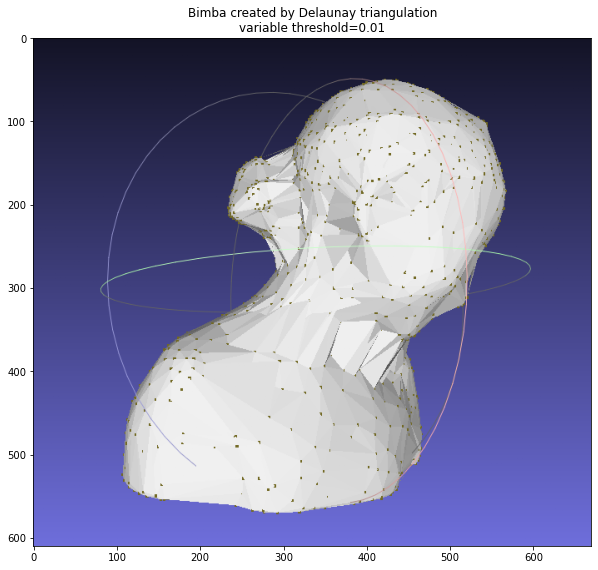

In [22]:
# Load the image file
img = mpimg.imread('bimba_tvar0,01.png')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title(f'Bimba created by Delaunay triangulation\nvariable threshold=0.01')
plt.show()

**NOTE:**

With the variable treshold of `0.01`, we obtain a result where some areas are better detailed, maybe there is something to do with that.  
We have a problem tho in the chin because it is not high dense...